# Этап 1 | Обучающая выборка | Ранжирование

## 1. Построение обучающей выборки
Пусть 
$$
\begin{cases}
    E = \sigma_1 (x + D)\\
    S_x = \sigma_2 (x + D)
\end{cases}
-D < x < 0
$$
$$
\begin{cases}
    G = (x + D_0)^2\\
    S_{\tau} = cos(2\pi\tau) + 1
\end{cases}
0 < \tau < 1
$$
Возьмем в качестве $v_i$
$$
x_{yng} = A_{yng} + B_{yng}cos(2\pi\tau)\ \ \ \ \ \ x_{old} = A_{old} + B_{old}cos(2\pi\tau)
$$

Ключевые макропараметры:

        Для молодых особей:
$$
M_1(v_i) = \int_0^1 E(x_{yngi}(\tau))d\tau\ \ \ \ \ \ M_2(v_i) = \int_0^1 S_{\tau}(\tau)S_x(x_{yngi}(\tau))d\tau\ \ \ \ \ \ M_3(v_i) = -\int_0^1 (x'_{yngi}(\tau))d\tau\ \ \ \ \ \ M_4(v_i) = -\int_0^1 G(x_{yngi}(\tau))d\tau
$$
        Для взрослых особей:
$$
M_5(v_i) = \int_0^1 E(x_{oldi}(\tau))d\tau\ \ \ \ \ \ M_6(v_i) = \int_0^1 S_{\tau}(\tau)S_x(x_{oldi}(\tau))d\tau\ \ \ \ \ \ M_7(v_i) = -\int_0^1 (x'_{oldi}(\tau))d\tau\ \ \ \ \ \ M_8(v_i) = -\int_0^1 G(x_{oldi}(\tau))d\tau
$$



Эмпирические данные 

In [1]:
alpha_y = 0.0016
alpha_o = 0.006
betta_y = 0.0000007
betta_o = 0.000000075
gamma_y = 0.00008
gamma_o = 0.004
delta_y = 0.000016
delta_o = 0.00006

D = 120
D0 = 70  
sigma1 = 1
sigma2 = 1
Nmax = 30

Используемые библиотеки

In [2]:
import csv
import random as rn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Генерация параметров для стратегий

Запись параметров обучающей выборки 

In [3]:
def rand_AB(Nmax):
   A_yng = []
   B_yng = []
   A_old = []
   B_old = []
   for i in range(0, Nmax):
      Ay = round(rn.uniform(-D, 0), 3)
      By = round(rn.uniform(-min(Ay + D, -Ay), min(Ay + D, -Ay)), 3)
      A_yng.append(Ay)
      B_yng.append(By)

      Ao = round(rn.uniform(-D, 0), 3)
      Bo = round(rn.uniform(-min(Ao + D, -Ao), min(Ao + D, -Ao)), 3)
      A_old.append(Ao)
      B_old.append(Bo)
   
   data_AB = {'A_yng': A_yng, 'B_yng': B_yng, 'A_old': A_old, 'B_old': B_old}
   dataAB = pd.DataFrame(data = data_AB)
   dataAB.to_csv("data_AB.csv", index=False, sep="\t")
   return A_yng, B_yng, A_old, B_old

Создание стратегий

In [4]:
def strategy(t, AB):
   Ay = AB[0]
   By = AB[1]
   Ao = AB[2]
   Bo = AB[3]
   x_yng = []
   x_old = []
   for i in range(0, Nmax):
      xyng = Ay[i] + By[i]*np.cos(2*np.pi*t)
      x_yng.append(xyng)

      xold = Ao[i] + Bo[i]*np.cos(2*np.pi*t)
      x_old.append(xold)
   return x_yng, x_old

In [5]:
def M(AB):
   Ay = AB[0]
   By = AB[1]
   Ao = AB[2]
   Bo = AB[3]
   
   M1 = []
   M2 = []
   M3 = []
   M4 = []
   M5 = []
   M6 = []
   M7 = []
   M8 = []
   for i in range(0, Nmax):
      M1.append(round(sigma1*(Ay[i] + D), 5))
      M2.append(round(-sigma2*(Ay[i] + D + By[i]/2), 5))
      M3.append(round(-2*(np.pi*By[i])**2, 5))
      M4.append(round(-((Ay[i] + D0)**2 + (By[i]**2)/2), 5))
      M5.append(round(sigma1*(Ao[i] + D), 5))
      M6.append(round(-sigma2*(Ao[i] + D + Bo[i]/2), 5))
      M7.append(round(-2*(np.pi*Bo[i])**2, 5))
      M8.append(round(-((Ao[i] + D0)**2 + (Bo[i]**2)/2), 5))

   data_M = {'M1': M1, 'M2': M2, 'M3': M3, 'M4': M4, 'M5': M5, 'M6': M6, 'M7': M7, 'M8': M8}
   dataM = pd.DataFrame(data = data_M)
   dataM.to_csv("data_M.csv", index=False, sep="\t")
   return M1, M2, M3, M4, M5, M6, M7, M8

Тут строятся все синусоиды СВМ зоопланктона

Миграции молодых особей


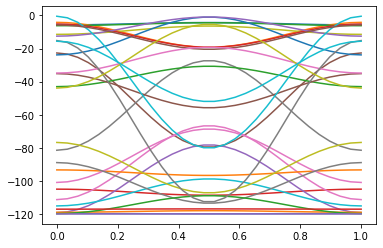

Миграции взрослых особей


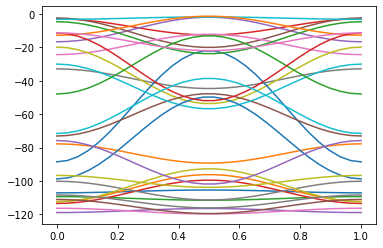

In [6]:
t = np.linspace(0, 1, Nmax)
AB = rand_AB(Nmax)
x = strategy(t, AB)
x_yng = x[0]
x_old = x[1]
DVM_yng = []
DVM_old = []
print('Миграции молодых особей')
for i in range (0, Nmax):
   DVM_yng.append(x_yng[i])
   plt.plot(t, DVM_yng[i])
plt.show()
print('Миграции взрослых особей')
for i in range (0, Nmax):
   DVM_old.append(x_old[i])
   plt.plot(t, DVM_old[i])
plt.show()


In [7]:
param_M = M(AB)
M1 = param_M[0]
M2 = param_M[1]
M3 = param_M[2]
M4 = param_M[3]
M5 = param_M[4]
M6 = param_M[5]
M7 = param_M[6]
M8 = param_M[7]

for i in range(0, Nmax):
   r = 0
   s = 0
   p = 0
   q = 0
   r = alpha_o*M5[i] + betta_o*M7[i] + delta_o*M8[i]
   s = gamma_o*M6[i]
   p = alpha_y*M1[i] + betta_y*M3[i] + delta_y*M4[i]
   q = gamma_y*M2[i]